In [210]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from scipy import stats
import numpy as np
import seaborn as sns

In [211]:
hot_songs=pd.read_csv('hot_100_features.csv')
hot_songs=hot_songs[['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','Popularity']]

In [212]:
hot_songs.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,Popularity
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.182,0.691,0.647,0.000,5.500,0.165,-6.113,0.700,0.131,123.287,0.435,86.560
std,0.190,0.136,0.152,0.001,3.686,0.102,2.176,0.461,0.119,31.798,0.200,8.086
min,0.003,0.375,0.306,0.000,0.000,0.044,-18.064,0.000,0.025,72.989,0.050,53.000
25%,0.035,0.584,0.557,0.000,2.000,0.095,-7.487,0.000,0.045,97.581,0.274,81.000
50%,0.099,0.699,0.651,0.000,6.000,0.123,-5.857,1.000,0.071,120.143,0.425,88.000
75%,0.272,0.782,0.771,0.000,8.250,0.205,-4.844,1.000,0.201,147.272,0.565,93.000
max,0.808,0.964,0.909,0.013,11.000,0.552,-2.306,1.000,0.530,203.911,0.964,100.000


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


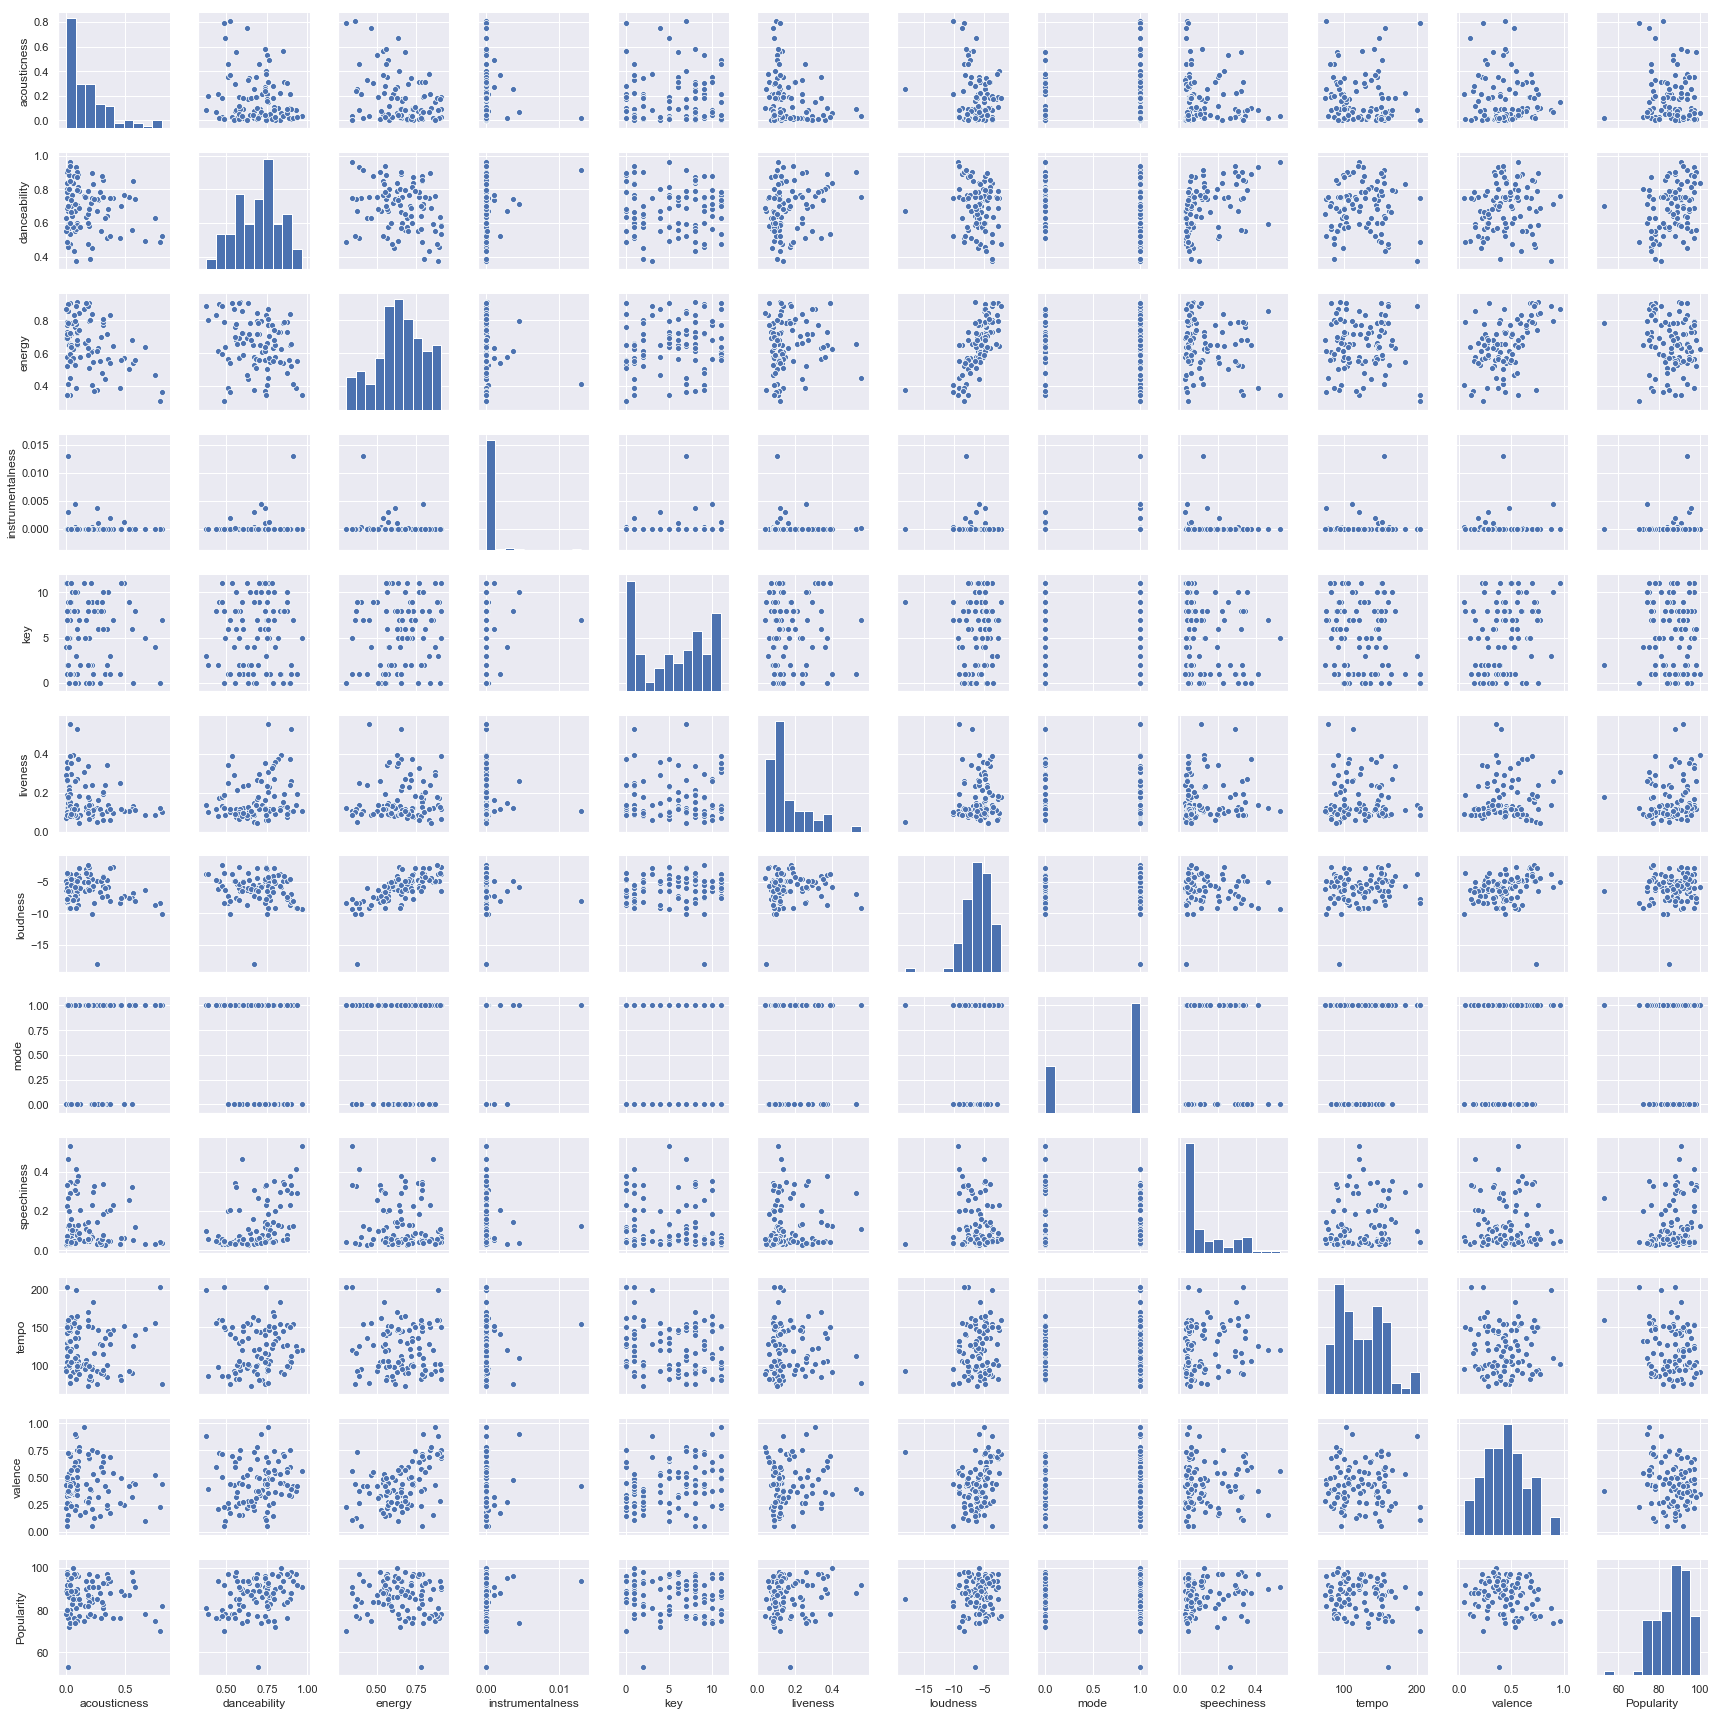

In [213]:
sns.pairplot(hot_songs, size=2)
plt.show()

In [214]:
col_study=['loudness','valence','tempo','mode']


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


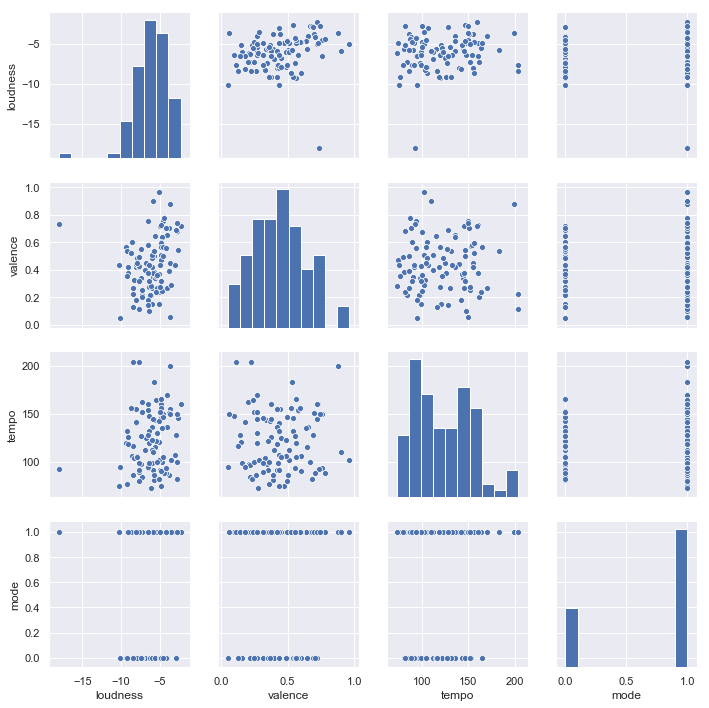

In [215]:
sns.pairplot(hot_songs[col_study],size=2.5)
plt.show()

In [216]:
pd.options.display.float_format = '{:,.3f}'.format

In [217]:
hot_songs.corr()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,Popularity
acousticness,1.000,-0.166,-0.328,-0.077,-0.015,-0.250,-0.201,0.100,-0.172,-0.061,-0.093,-0.119
danceability,-0.166,1.000,-0.246,0.148,-0.047,0.210,-0.182,-0.248,0.447,0.025,0.109,0.294
energy,-0.328,-0.246,1.000,-0.145,0.250,0.098,0.705,-0.011,-0.172,-0.064,0.491,-0.081
instrumentalness,-0.077,0.148,-0.145,1.000,0.082,-0.050,-0.087,0.049,-0.048,0.053,0.020,0.094
key,-0.015,-0.047,0.250,0.082,1.000,0.022,0.110,-0.196,-0.237,-0.149,0.294,-0.082
liveness,-0.250,0.210,0.098,-0.050,0.022,1.000,0.096,-0.148,0.030,-0.076,0.108,0.128
loudness,-0.201,-0.182,0.705,-0.087,0.110,0.096,1.000,0.023,-0.158,0.138,0.234,0.043
mode,0.100,-0.248,-0.011,0.049,-0.196,-0.148,0.023,1.000,-0.276,0.120,0.051,-0.074
speechiness,-0.172,0.447,-0.172,-0.048,-0.237,0.030,-0.158,-0.276,1.000,0.195,-0.061,0.139
tempo,-0.061,0.025,-0.064,0.053,-0.149,-0.076,0.138,0.120,0.195,1.000,-0.026,-0.162


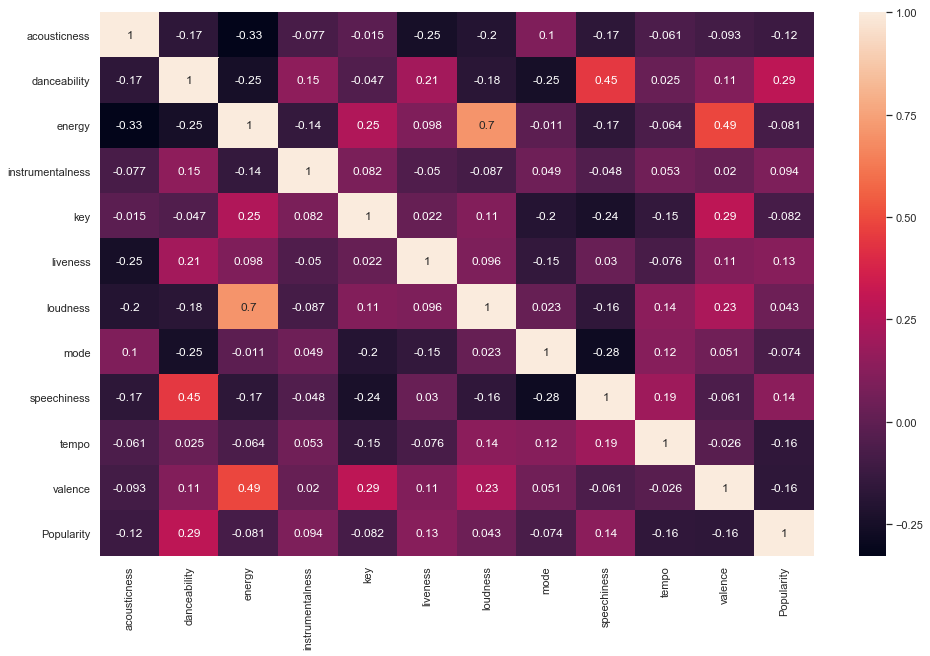

In [218]:
plt.figure(figsize=(16,10))
sns.heatmap(hot_songs.corr(),annot=True)
plt.show()

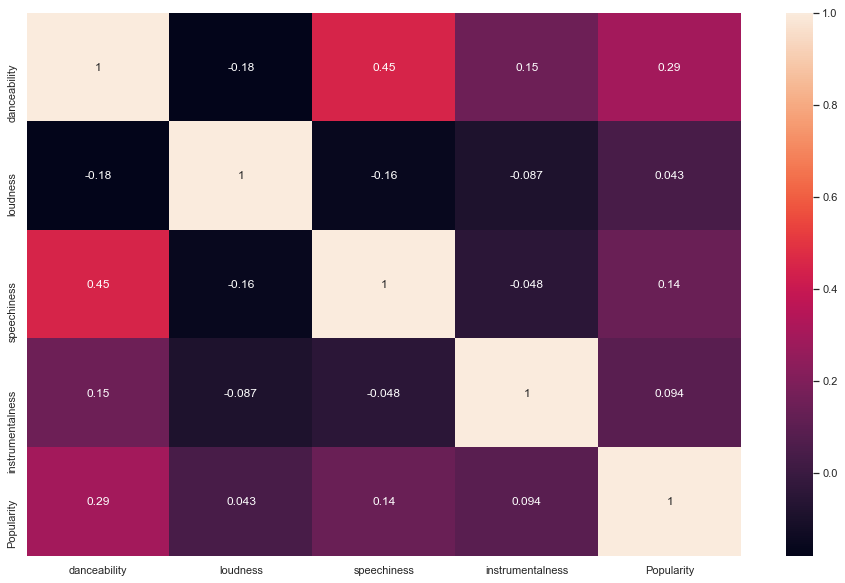

In [219]:
plt.figure(figsize=(16,10))
sns.heatmap(hot_songs[['danceability','loudness','speechiness','instrumentalness','Popularity']].corr(),annot=True)
plt.show()

In [220]:
y=hot_songs['Popularity']

In [221]:
x=hot_songs['danceability']

# Linear Regression model

In [222]:
model=LinearRegression(fit_intercept=True)

In [223]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [224]:
X=np.asarray(x)
X=X.reshape(-1,1)

In [225]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [226]:
model.coef_

array([17.5232878])

In [227]:
model.intercept_

74.45421185629402

In [228]:
x_fit=np.linspace(0.4,1)
x_fit=x_fit.reshape(-1,1)

In [229]:
y_fit=model.predict(x_fit)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


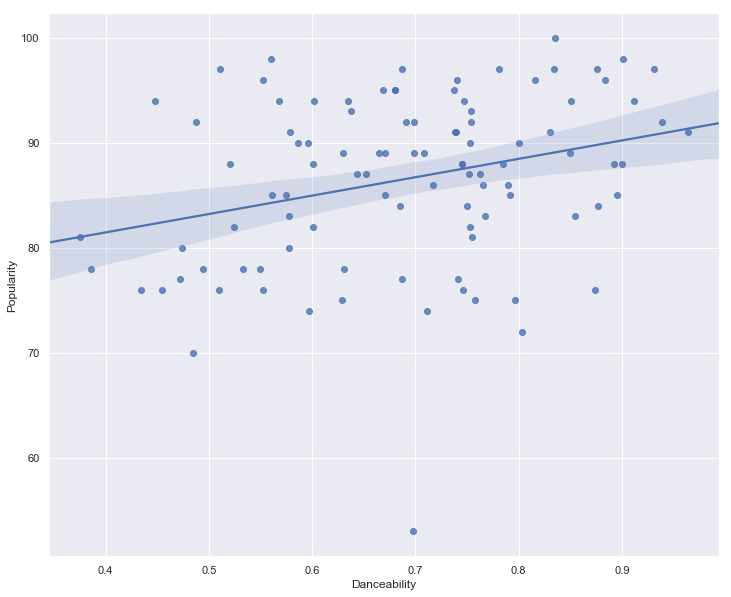

In [230]:
plt.figure(figsize=(12,10))
sns.regplot(X,y)
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


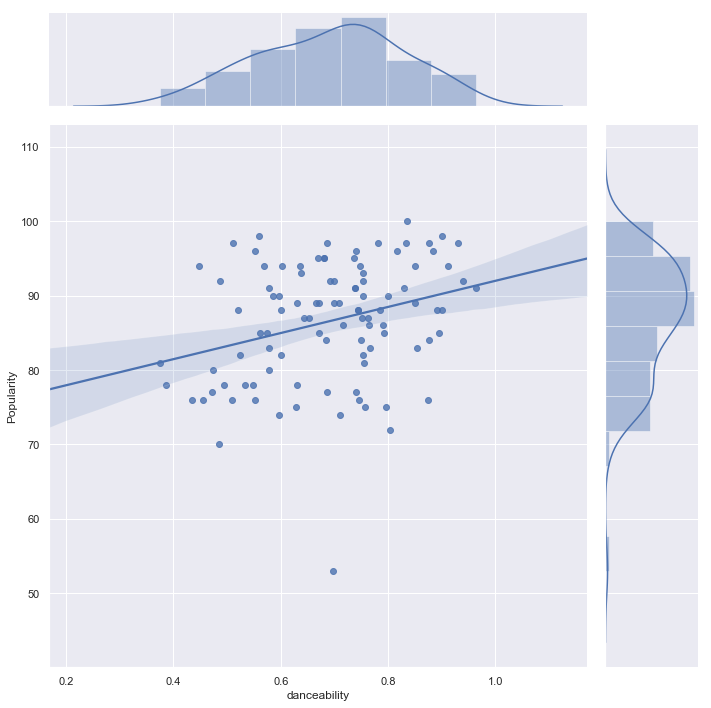

In [231]:
sns.jointplot(x='danceability',y='Popularity',data=hot_songs,kind='reg',size=10)
plt.show()

# Ransac model to mark the outlier

In [232]:
ransac=RANSACRegressor()

In [233]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [234]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [235]:
line_x=np.linspace(0.4,1)
line_y=ransac.predict(line_x.reshape(-1,1))

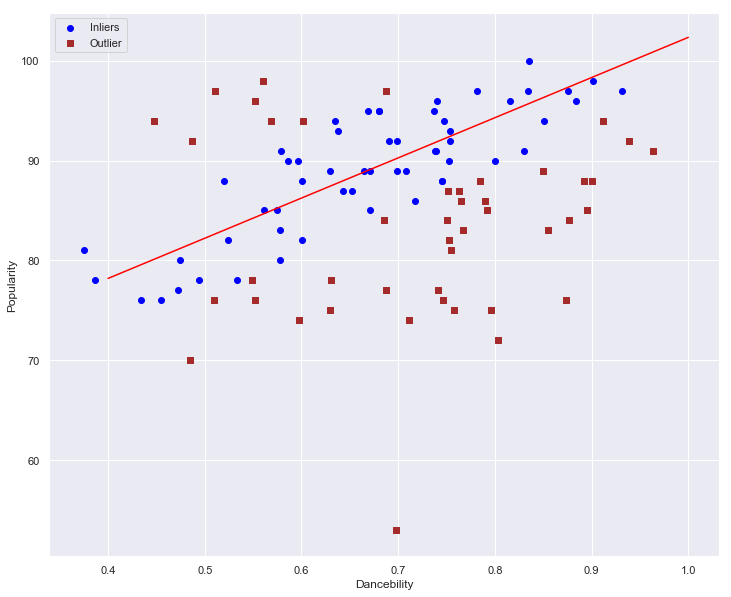

In [236]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='Outlier')
plt.plot(line_x,line_y,color='red')
plt.legend()
plt.xlabel('Dancebility')
plt.ylabel('Popularity')
plt.show()


# Performance evaluation


In [237]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [238]:
lr=LinearRegression()

In [239]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [240]:
y_train_pred= lr.predict(X_train)

In [241]:
y_test_pred=lr.predict(X_test)

# Residual Analysis (Range -3 to 3)

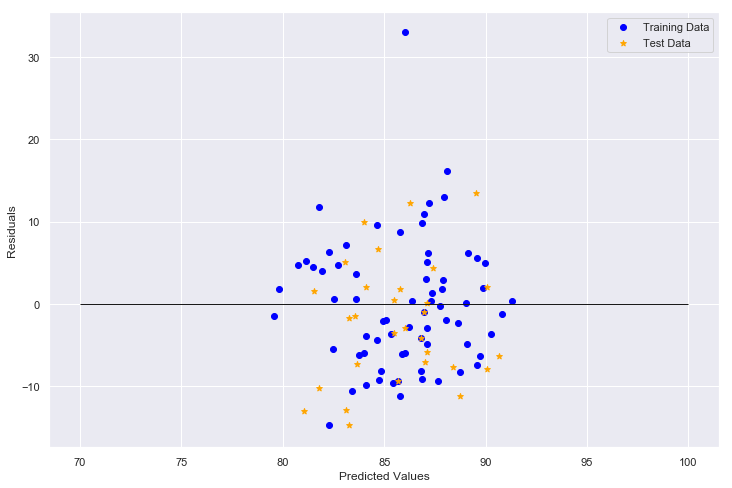

In [242]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue', marker='o',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='orange', marker='*',label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0,xmin=70,xmax=100, lw=1, color='k')
plt.legend()


# Mean square - Average value of the sums of squared error

In [243]:
mean_squared_error(y_train,y_train_pred)

60.27683166206402

In [244]:
mean_squared_error(y_test,y_test_pred)

58.33720899639

# Range should be around 1

# Coefficient of determination 1-SSE/SST (range close to 1)

In [245]:
r2_score(y_train,y_train_pred)

0.11054352430822456

In [246]:
r2_score(y_test,y_test_pred)

-0.06714406700713416

# Multi variable

In [247]:
X1=hot_songs.iloc[:,:-1].values

In [248]:
y1=hot_songs['Popularity'].values

In [249]:
X_train1, X_test1, y_train1, y_test1=train_test_split(X1,y1, test_size=0.2, random_state=0)

In [250]:
lr=LinearRegression()

In [251]:
lr.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
y_train_pred1=lr.predict(X_train1)

In [253]:
y_test_pred1=lr.predict(X_test1)

# Residual

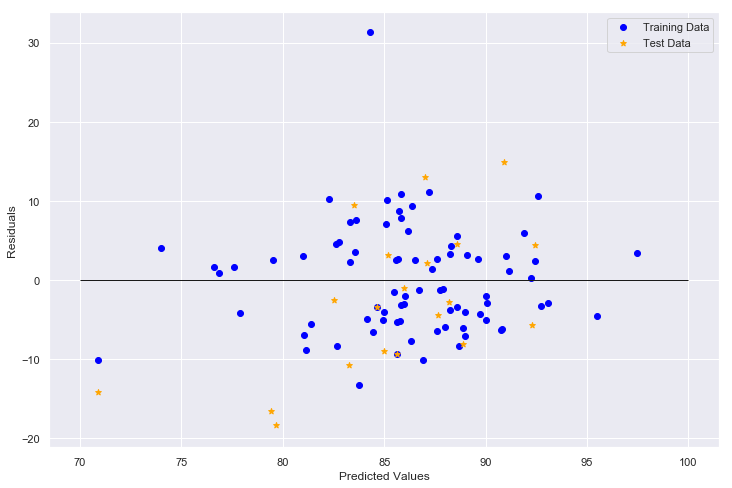

In [254]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred1,y_train_pred1-y_train1,c='blue', marker='o',label='Training Data')
plt.scatter(y_test_pred1,y_test_pred1-y_test1,c='orange', marker='*',label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0,xmin=70,xmax=100, lw=1, color='k')
plt.legend()

# Mean Square

In [255]:
mean_squared_error(y_train1,y_train_pred1)


45.725174271606434

In [256]:
mean_squared_error(y_test1,y_test_pred1)

88.74761439896864

# Coefficient of determination

In [257]:
r2_score(y_train1,y_train_pred1)

0.31018450952834387

In [258]:
r2_score(y_test1,y_test_pred1)

-0.604041650155323